In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [16]:
# Create dataset
X,y = make_classification(n_samples=1000, n_classes=2, random_state=42)

In [17]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [ ]:
# generating a no skill prediction with zero as output (majority class)
# creating a dummy model that will give the probability of that particular point of the dataset as zero.

dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

In [29]:
# create logistic model
model = LogisticRegression(C=1.0, solver='liblinear')  # Regularized model
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# making the prediction wrt probability of the datapoints lying in which category
model_prob = model.predict_proba(X_test)
model_prob

# the 1st column shows the probability of getting class 0 and the 2nd column shows the probability of getting class 1

array([[4.20516799e-01, 5.79483201e-01],
       [1.41232774e-01, 8.58767226e-01],
       [5.09186292e-01, 4.90813708e-01],
       [1.32052730e-01, 8.67947270e-01],
       [5.23071510e-02, 9.47692849e-01],
       [9.39217370e-01, 6.07826300e-02],
       [7.78310291e-01, 2.21689709e-01],
       [1.88994082e-01, 8.11005918e-01],
       [2.55611733e-01, 7.44388267e-01],
       [6.63062896e-01, 3.36937104e-01],
       [5.03334564e-02, 9.49666544e-01],
       [4.41783676e-01, 5.58216324e-01],
       [9.95623855e-01, 4.37614456e-03],
       [5.44577281e-01, 4.55422719e-01],
       [2.59122704e-01, 7.40877296e-01],
       [8.14981311e-01, 1.85018689e-01],
       [9.40402422e-01, 5.95975781e-02],
       [5.35406561e-02, 9.46459344e-01],
       [1.30318962e-01, 8.69681038e-01],
       [5.15285453e-01, 4.84714547e-01],
       [7.62932151e-03, 9.92370678e-01],
       [7.78642527e-01, 2.21357473e-01],
       [9.49122466e-01, 5.08775338e-02],
       [9.08313038e-01, 9.16869623e-02],
       [3.675299

In [ ]:
# focusing on probability of getting class 1 
model_prob = model_prob[:,1]
model_prob

array([0.5794832 , 0.85876723, 0.49081371, 0.86794727, 0.94769285,
       0.06078263, 0.22168971, 0.81100592, 0.74438827, 0.3369371 ,
       0.94966654, 0.55821632, 0.00437614, 0.45542272, 0.7408773 ,
       0.18501869, 0.05959758, 0.94645934, 0.86968104, 0.48471455,
       0.99237068, 0.22135747, 0.05087753, 0.09168696, 0.963247  ,
       0.00685243, 0.99952387, 0.93289682, 0.0178007 , 0.966896  ,
       0.87651085, 0.98633834, 0.53783887, 0.16117619, 0.29060672,
       0.21700849, 0.06819356, 0.41312538, 0.05118299, 0.32672789,
       0.01762771, 0.94381156, 0.07329451, 0.47623223, 0.47742958,
       0.01145533, 0.9908637 , 0.00576811, 0.82833857, 0.98763461,
       0.08024129, 0.09391968, 0.01701154, 0.99571315, 0.9956113 ,
       0.67148975, 0.01808104, 0.10347292, 0.77637652, 0.17405239,
       0.70193833, 0.10111815, 0.09985227, 0.99941111, 0.99907018,
       0.0429905 , 0.98302079, 0.74432933, 0.70436077, 0.27187163,
       0.10985121, 0.48678373, 0.40771274, 0.14202816, 0.12676

In [32]:
# Calculating the accuracy score for dummy and model
dummy_model_acc = roc_auc_score(y_test,dummy_model_prob)
model_acc = roc_auc_score(y_test,model_prob)
print(dummy_model_acc)
print(model_acc)

0.5
0.9243800322061193


In [41]:
# Calculating roc curve
# For the dummy model
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)

# For the trained model
model_fpr, model_tpr, model_thresholds = roc_curve(y_test, model_prob)

In [42]:
model_thresholds

array([       inf, 0.99980909, 0.93473453, 0.93289682, 0.90642724,
       0.90251575, 0.88934566, 0.88399842, 0.88007738, 0.87721963,
       0.87709422, 0.87651085, 0.86968104, 0.86962254, 0.74820065,
       0.74438827, 0.74432933, 0.7408773 , 0.68604124, 0.67611136,
       0.55821632, 0.54535472, 0.52238733, 0.52111449, 0.49335655,
       0.49230023, 0.49081371, 0.48678373, 0.47623223, 0.46663293,
       0.43529977, 0.41312538, 0.40900535, 0.40771274, 0.40509507,
       0.4043522 , 0.39561122, 0.35665381, 0.35408234, 0.3369371 ,
       0.33460679, 0.29060672, 0.28216332, 0.27187163, 0.24957014,
       0.21700849, 0.21580084, 0.21050967, 0.20504485, 0.18501869,
       0.17405239, 0.13928046, 0.13719947, 0.13593898, 0.12809364,
       0.11478955, 0.11060239, 0.10727065, 0.10347292, 0.05087753,
       0.04831275, 0.01377322, 0.00777647, 0.00301289])

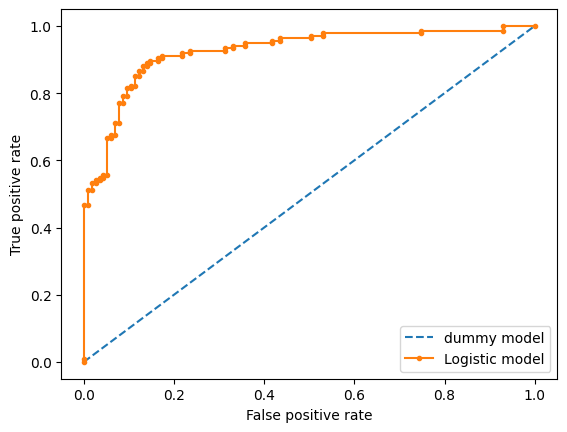

In [40]:
# Ploting the roc curve
plt.plot(dummy_fpr,dummy_tpr, linestyle='--', label='dummy model')
plt.plot(model_fpr,model_tpr, marker='.', label='Logistic model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

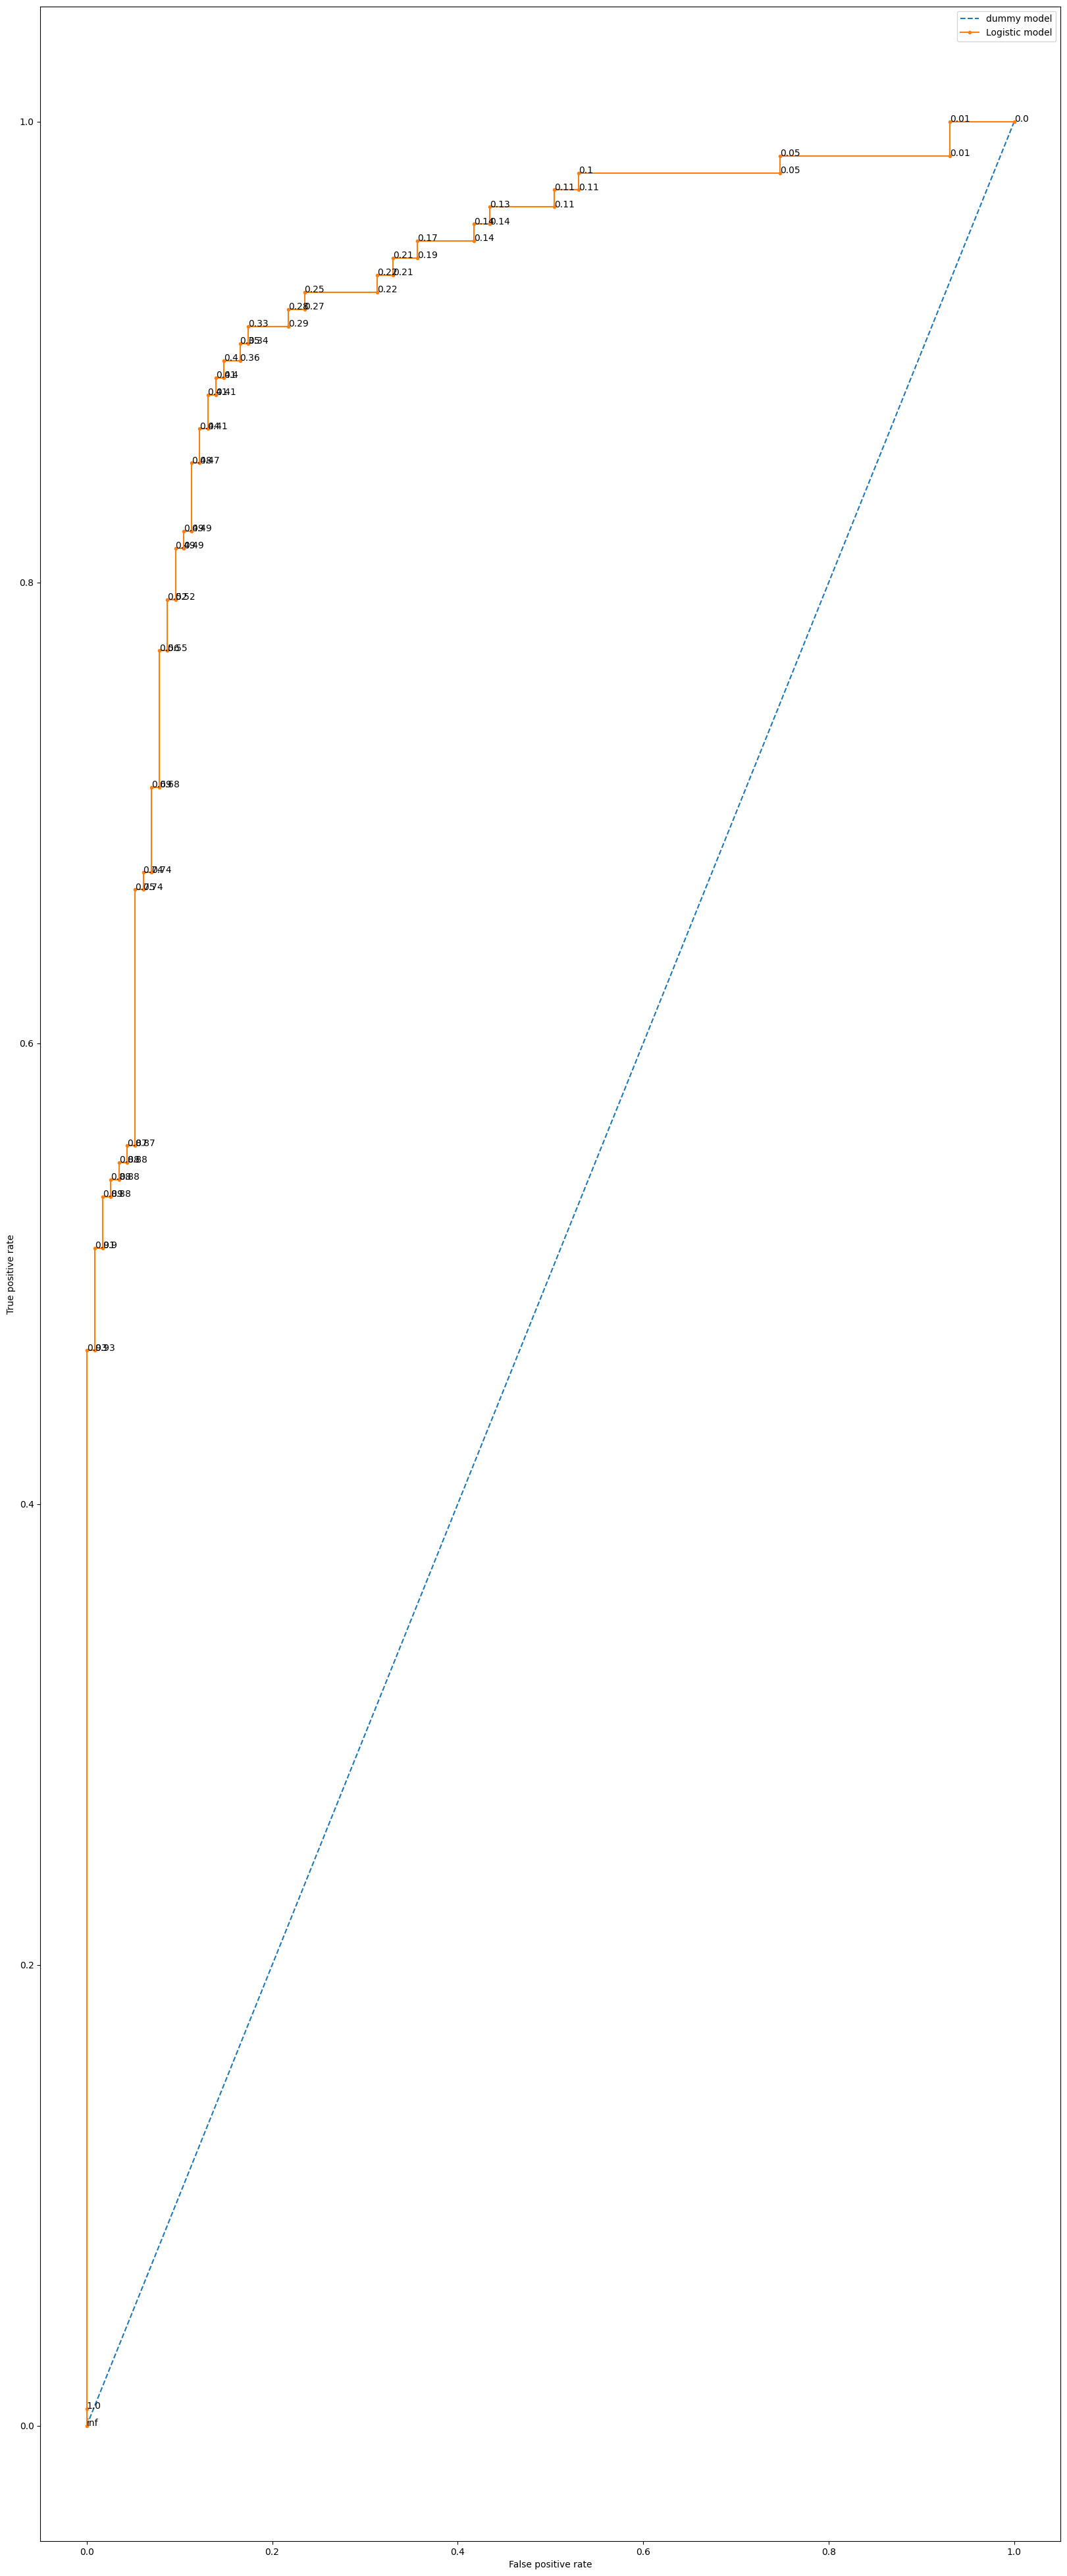

In [ ]:
# ploting the thresholds on the roc curve
import numpy as np
fig = plt.figure(figsize=(20,50))
plt.plot(dummy_fpr,dummy_tpr, linestyle='--', label='dummy model')
plt.plot(model_fpr,model_tpr, marker='.',linestyle='-', label='Logistic model')
for xyz in zip(model_fpr, model_tpr, model_thresholds):
    plt.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

In [53]:
# finding the best threshold value for our model
j_score = model_tpr - model_fpr
best_threshold_index = np.argmax(j_score)
best_threshold = model_thresholds[best_threshold_index]
print(f'Best threshold for model : {best_threshold}')
print(f"J statistic at best threshold: {j_score[best_threshold_index]}")

Best threshold for model : 0.40900535476650846
J statistic at best threshold: 0.7510466988727859
